In [1]:
!pip install xgboost imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin-1') # or 'cp1252'

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df['Gender of the patient'] = LabelEncoder().fit_transform(df['Gender of the patient'])

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:
df['Result'] = df['Result'].apply(lambda x: 1 if x == 2 else 0)

In [8]:
X = df.drop('Result', axis=1)
y = df['Result']

In [9]:
# Split data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Apply SMOTE for balancing the dataset
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [11]:
xgb_model = XGBClassifier()
log_reg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

In [12]:
xgb_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [13]:
xgb_pred = xgb_model.predict(X_val)
log_reg_pred = log_reg_model.predict(X_val)
dt_pred = dt_model.predict(X_val)

In [14]:
xgb_accuracy = accuracy_score(y_val, xgb_pred)
xgb_precision = precision_score(y_val, xgb_pred)
xgb_recall = recall_score(y_val, xgb_pred)
xgb_f1 = f1_score(y_val, xgb_pred)
xgb_roc_auc = roc_auc_score(y_val, xgb_pred)

In [15]:
print("XGBoost Model Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"ROC AUC Score: {xgb_roc_auc}")
print("\n")

XGBoost Model Metrics:
Accuracy: 0.9977194982896237
Precision: 0.9982373678025852
Recall: 0.9935672514619883
F1 Score: 0.9958968347010551
ROC AUC Score: 0.9964449488287589




In [16]:

log_reg_accuracy = accuracy_score(y_val, log_reg_pred)
log_reg_precision = precision_score(y_val, log_reg_pred)
log_reg_recall = recall_score(y_val, log_reg_pred)
log_reg_f1 = f1_score(y_val, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_val, log_reg_pred)


print("Logistic Regression Model Metrics:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")
print(f"ROC AUC Score: {log_reg_roc_auc}")
print("\n")


dt_accuracy = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)
dt_roc_auc = roc_auc_score(y_val, dt_pred)


print("Decision Tree Model Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print(f"ROC AUC Score: {dt_roc_auc}")

Logistic Regression Model Metrics:
Accuracy: 0.7152630721615898
Precision: 0.4704968944099379
Recall: 0.17719298245614035
F1 Score: 0.2574341546304163
ROC AUC Score: 0.5501002166739948


Decision Tree Model Metrics:
Accuracy: 0.9900635282619319
Precision: 0.9841456253669995
Recall: 0.9801169590643275
F1 Score: 0.9821271608555523
ROC AUC Score: 0.9870103874120463


In [17]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [18]:
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

In [19]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

Accuracy: 0.9969050333930608
Precision: 0.9935785172212492
Recall: 0.9953216374269006
F1 Score: 0.9944493134677184
ROC AUC Score: 0.999454749993068


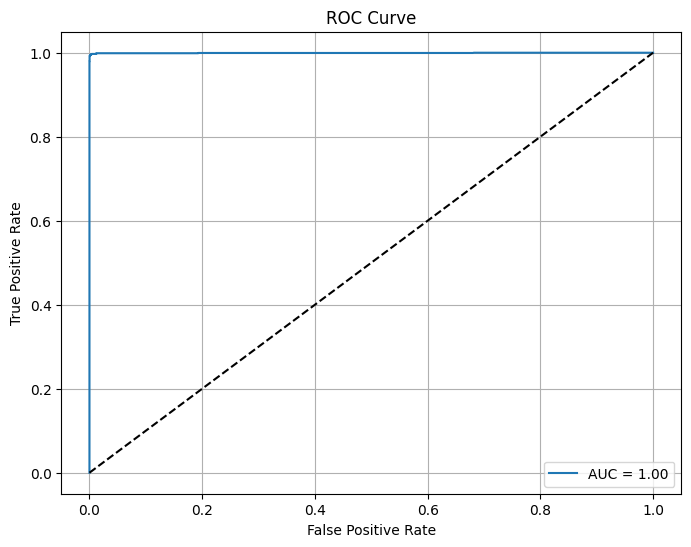

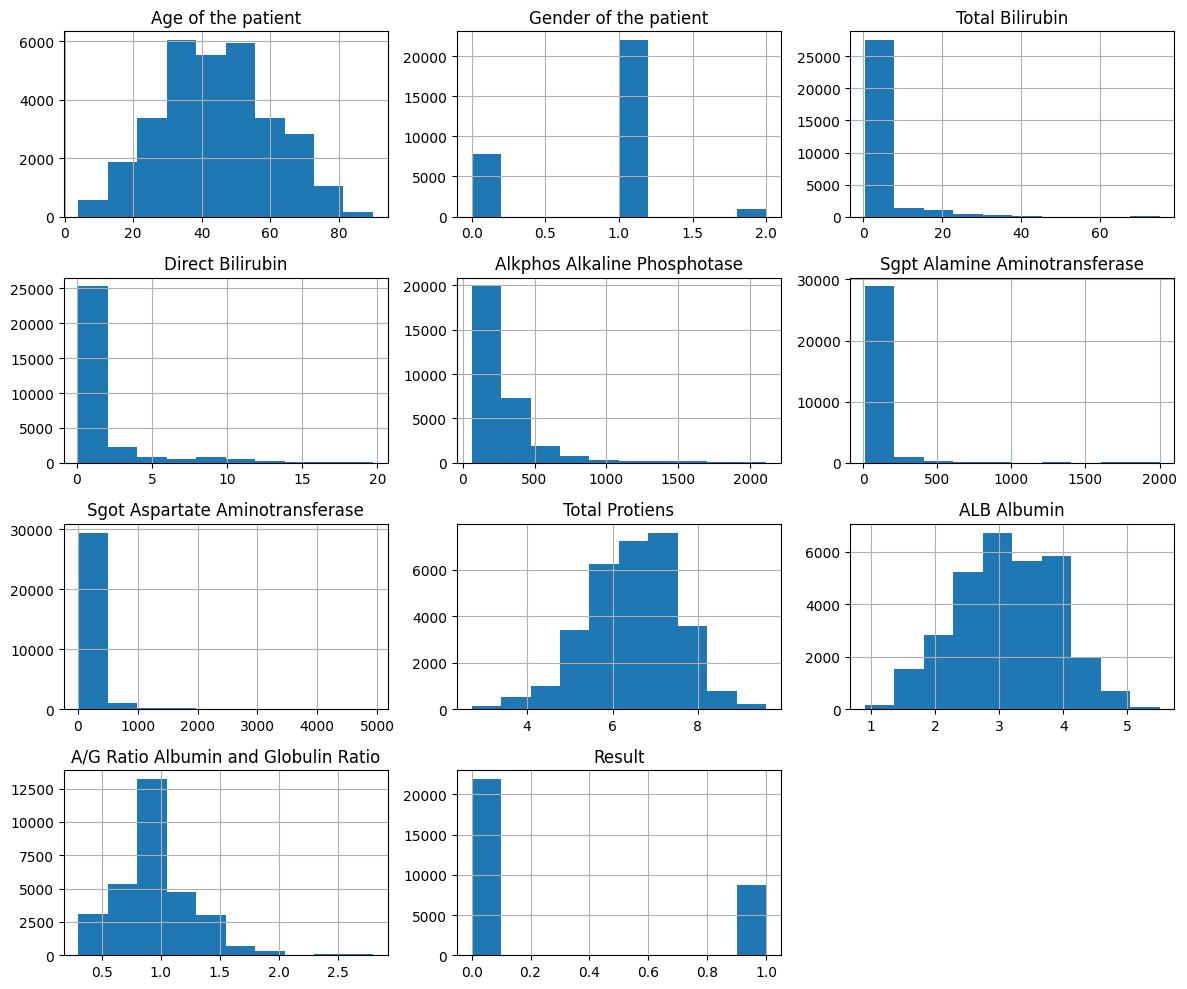

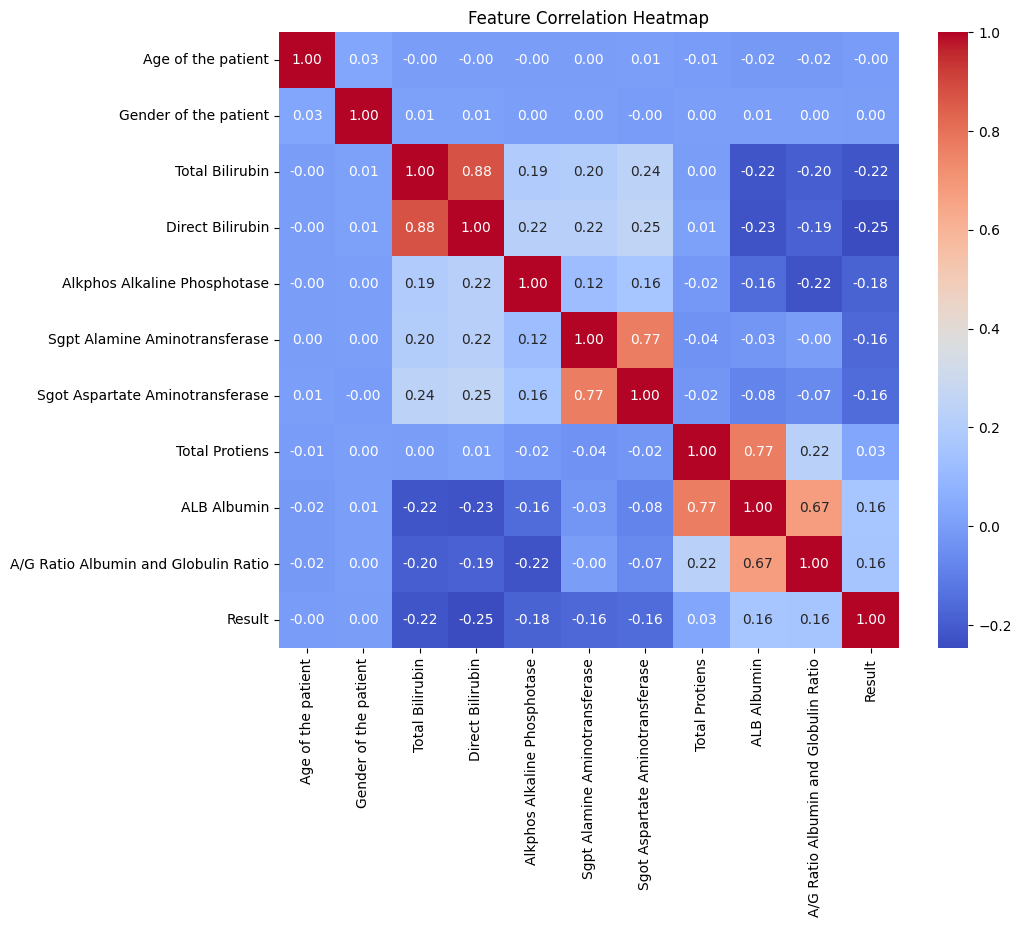

In [20]:
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_proba):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<Figure size 600x500 with 0 Axes>

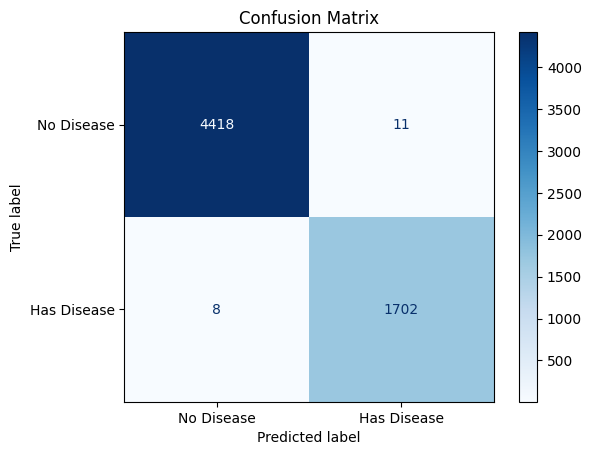

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Has Disease"])


plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [23]:
import joblib

# Assuming your model is named svc_model (you can use any model object here)
joblib.dump(xgb_model, 'liver.sav')




['liver.sav']